In [ ]:
import numpy as np
import matplotlib.pyplot as plt
kernel = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
])

picture = plt.imread('pic.jpg')

In [ ]:
print(picture)

[[[ 58  58  58]
  [ 57  57  57]
  [ 58  58  58]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 57  57  57]
  [ 57  57  57]
  [ 57  57  57]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 61  61  61]
  [ 62  62  62]
  [ 62  62  62]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[223 223 223]
  [221 221 221]
  [209 209 209]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[212 212 212]
  [216 216 216]
  [199 199 199]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[216 216 216]
  [215 215 215]
  [204 204 204]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [ ]:
picture.shape

(823, 564, 3)

In [ ]:
def convolution(picture: np.array, kernel: np.array)->np.array:
    kernel_h, kernel_w = kernel.shape
    picture_h, picture_w, picture_ch = picture.shape
    stride = 1
    padding = 0 
    """
    формула lдля нового изображеня:
        W(out) = (W(in) - kernel_W + 2*Padding)/Stride +1
        H(out) = (H(in) - kernel_H + 2*Padding)/Stride +1
        Padding - заполнение вокруг границ
        Stride - шаг пикселя
    """
    new_picture = np.zeros((
       int((picture_h - kernel_h + 2*padding)/stride-1),
       int((picture_w - kernel_w + 2*padding)/stride-1),
       picture_ch))
    for ch in range(picture_ch):
        for h in range(new_picture.shape[0]):
            for w in range(new_picture.shape[1]):
                new_picture[h,w,ch] = np.sum(picture[h: h + kernel_h, w:w + kernel_w,ch] * kernel).clip(0,255)
    return new_picture.astype(np.uint8)

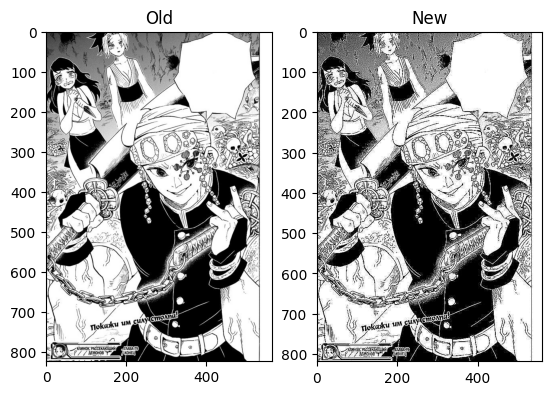

In [ ]:
plt.subplot(1, 2, 1)
plt.title('Old')
plt.imshow(picture)

new_picture = convolution(picture, kernel)
plt.subplot(1, 2, 2)
plt.imshow(new_picture)
plt.title('New')

plt.show()